Data Set Up

In [1]:
# Import dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#import the data to pandas and display it
#light cleaning to remove irrelevant columns and drop nas
loan_df=pd.read_csv('Resources/loan_data.csv')
loan_df=loan_df.drop(columns=['DAYS_EMPLOYED','NAME_INCOME_TYPE'])
loan_df=loan_df.dropna()
loan_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,OCCUPATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Secondary / secondary special,House / apartment,Laborers
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Higher education,House / apartment,Core staff
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Secondary / secondary special,House / apartment,Laborers
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Secondary / secondary special,House / apartment,Laborers
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Secondary / secondary special,House / apartment,Core staff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307504,456248,0,Cash loans,F,N,Y,0,153000.0,331920.0,16096.5,225000.0,Secondary / secondary special,House / apartment,Sales staff
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Secondary / secondary special,With parents,Sales staff
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Higher education,House / apartment,Managers
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Secondary / secondary special,House / apartment,Laborers


In [3]:
#display data types for each column
loan_df.dtypes

SK_ID_CURR               int64
TARGET                   int64
NAME_CONTRACT_TYPE      object
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
AMT_CREDIT             float64
AMT_ANNUITY            float64
AMT_GOODS_PRICE        float64
NAME_EDUCATION_TYPE     object
NAME_HOUSING_TYPE       object
OCCUPATION_TYPE         object
dtype: object

In [4]:
#create dummy variables in the selected columns
loan_df_dummies = pd.get_dummies(loan_df, columns=['NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE','OCCUPATION_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY'], drop_first=True,dtype=int)
loan_df_dummies

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,...,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y
0,100002,1,Cash loans,0,202500.0,406597.5,24700.5,351000.0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,100003,0,Cash loans,0,270000.0,1293502.5,35698.5,1129500.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,0,67500.0,135000.0,6750.0,135000.0,0,0,...,0,0,0,0,0,0,1,0,1,1
3,100006,0,Cash loans,0,135000.0,312682.5,29686.5,297000.0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,100007,0,Cash loans,0,121500.0,513000.0,21865.5,513000.0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307504,456248,0,Cash loans,0,153000.0,331920.0,16096.5,225000.0,0,0,...,0,0,1,0,0,0,0,0,0,1
307506,456251,0,Cash loans,0,157500.0,254700.0,27558.0,225000.0,0,0,...,0,0,1,0,0,0,1,0,0,0
307508,456253,0,Cash loans,0,153000.0,677664.0,29979.0,585000.0,1,0,...,0,0,0,0,0,0,0,0,0,1
307509,456254,1,Cash loans,0,171000.0,370107.0,20205.0,319500.0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
#define the dependent and independent variables
data=loan_df.drop(columns=['TARGET','SK_ID_CURR'])
target=loan_df['TARGET']

In [6]:
#create dummies with numeric values in the data
data = pd.get_dummies(data)
data.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
0,0,202500.0,406597.5,24700.5,351000.0,True,False,False,True,False,...,True,False,False,False,False,False,False,False,False,False
1,0,270000.0,1293502.5,35698.5,1129500.0,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,67500.0,135000.0,6750.0,135000.0,False,True,False,True,False,...,True,False,False,False,False,False,False,False,False,False
3,0,135000.0,312682.5,29686.5,297000.0,True,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
4,0,121500.0,513000.0,21865.5,513000.0,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
#use split data to create testing and training data sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,target)

In [8]:
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Instantiate a StandardScaler instance
scaler = StandardScaler()

# Fit the training data to the standard scaler
X_scaler = scaler.fit(X_train)

# Transform the training data using the scaler
X_train_scaled = X_scaler.transform(X_train)

# Transform the testing data using the scaler
X_test_scaled = X_scaler.transform(X_test)

LOGISTIC REGRESSION

In [9]:
#import dependencies
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [10]:
#create LR classifier
classifier = LogisticRegression(solver='lbfgs', random_state=1)
classifier

LogisticRegression(random_state=1)

In [11]:
# Train the data
classifier.fit(X_train, y_train)

c:\Users\prais_y3huf3n\anaconda3\envs\PythonData\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

In [12]:
# Score the model
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9124205734517751
Testing Data Score: 0.9112704373885664


In [13]:
# Predict outcomes for test data set
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
74621,0,0
78957,0,0
5230,0,0
175328,0,0
139754,0,0
...,...,...
258278,0,0
228983,0,0
171709,0,0
100778,0,0


In [14]:
# Display the accuracy score for the test dataset.
accuracy_score(y_test, predictions)

0.9112704373885664

Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [16]:
#Instantiate Random Forest Classifier
rf_model=RandomForestClassifier(n_estimators=300,random_state=78)


In [17]:
#fit the model on y_train data
rf_model=rf_model.fit(X_train_scaled,y_train)

In [18]:
#make predictions with the rf_model
predictions=rf_model.predict(X_test_scaled)

In [19]:
#create a confusion matrix to evaluate the models performance
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculate accuracy score
acc_score = accuracy_score(y_test, predictions)

In [20]:
#figure out which columns aer weighing most heavily into the model
importances = rf_model.feature_importances_
# List the top 10 most important features
importances_sorted = sorted(zip(rf_model.feature_importances_, data.columns), reverse=True)
importances_sorted[:10]

[(0.2553455380441093, 'AMT_ANNUITY'),
 (0.21360765485793431, 'AMT_INCOME_TOTAL'),
 (0.18349969996233065, 'AMT_CREDIT'),
 (0.12938525628119085, 'AMT_GOODS_PRICE'),
 (0.05123659404790829, 'CNT_CHILDREN'),
 (0.0117456347925062, 'FLAG_OWN_REALTY_N'),
 (0.011715014750268003, 'FLAG_OWN_REALTY_Y'),
 (0.011498939654923868, 'OCCUPATION_TYPE_Laborers'),
 (0.009286910401172516, 'OCCUPATION_TYPE_Sales staff'),
 (0.007619608500327538, 'NAME_HOUSING_TYPE_House / apartment')]

KNN Model

In [21]:
# Import the KNeighborsClassifier module from sklearn
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the KNeighborsClassifier model with n_neighbors = 3 
knn = KNeighborsClassifier(n_neighbors=3)

In [22]:
# Train the model using the training data
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [23]:
# Create predictions using the testing data
y_pred = knn.predict(X_test_scaled)

ACCURACY SCORES PER MODEL

In [24]:
# Print the classification report comparing the testing data to the model predictions
print('KNN MODEL CLASSIFICATION REPORT')
print(classification_report(y_test, y_pred))

KNN MODEL CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     48044
           1       0.15      0.04      0.07      4678

    accuracy                           0.89     52722
   macro avg       0.53      0.51      0.51     52722
weighted avg       0.84      0.89      0.87     52722



In [25]:
#display the results
print("RANDOM FOREST ACCURACY SCORE")
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

RANDOM FOREST ACCURACY SCORE
Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,47661,383
Actual 1,4596,82


Accuracy Score : 0.9055612457797504
Classification Report
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     48044
           1       0.18      0.02      0.03      4678

    accuracy                           0.91     52722
   macro avg       0.54      0.50      0.49     52722
weighted avg       0.85      0.91      0.87     52722



VIZUALISATIONS

In [26]:
# Selecting data for visualization
X_test_subset = X_test_scaled[:, :4]

In [27]:
#create class maps
class_mapping = {0: "No Default", 1: "Default"}
y_pred_labels = [class_mapping[label] for label in y_pred]

In [39]:
for index, column in enumerate(data.columns):
    print(f"Index: {index}, Column Name: {column}")

Index: 0, Column Name: CNT_CHILDREN
Index: 1, Column Name: AMT_INCOME_TOTAL
Index: 2, Column Name: AMT_CREDIT
Index: 3, Column Name: AMT_ANNUITY
Index: 4, Column Name: AMT_GOODS_PRICE
Index: 5, Column Name: NAME_CONTRACT_TYPE_Cash loans
Index: 6, Column Name: NAME_CONTRACT_TYPE_Revolving loans
Index: 7, Column Name: CODE_GENDER_F
Index: 8, Column Name: CODE_GENDER_M
Index: 9, Column Name: CODE_GENDER_XNA
Index: 10, Column Name: FLAG_OWN_CAR_N
Index: 11, Column Name: FLAG_OWN_CAR_Y
Index: 12, Column Name: FLAG_OWN_REALTY_N
Index: 13, Column Name: FLAG_OWN_REALTY_Y
Index: 14, Column Name: NAME_EDUCATION_TYPE_Academic degree
Index: 15, Column Name: NAME_EDUCATION_TYPE_Higher education
Index: 16, Column Name: NAME_EDUCATION_TYPE_Incomplete higher
Index: 17, Column Name: NAME_EDUCATION_TYPE_Lower secondary
Index: 18, Column Name: NAME_EDUCATION_TYPE_Secondary / secondary special
Index: 19, Column Name: NAME_HOUSING_TYPE_Co-op apartment
Index: 20, Column Name: NAME_HOUSING_TYPE_House / apart

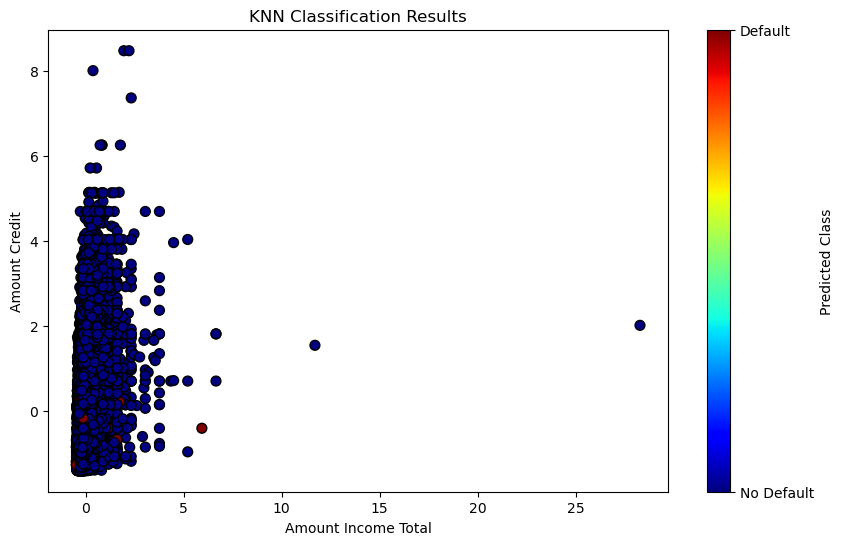

In [40]:
#plot the amount of credit versus total income
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_test_subset[:, 1], X_test_subset[:, 2], c=y_pred, cmap='jet', edgecolor='k', s=50)
plt.title('KNN Classification Results')
plt.xlabel('Amount Income Total')
plt.ylabel('Amount Credit')
cbar = plt.colorbar(scatter, ticks=np.unique(y_pred))
cbar.ax.set_yticklabels([class_mapping[i] for i in np.unique(y_pred)])
cbar.set_label('Predicted Class')
plt.show()

In [29]:
# Selecting data for visualization
X_test_subset = X_test_scaled[:, :6]

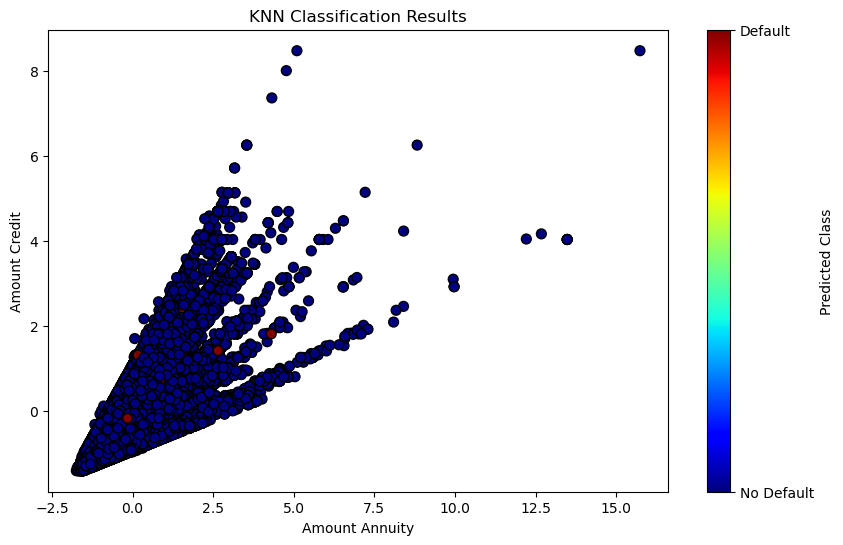

In [41]:
#plot credit amount versus annuity amount
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_test_subset[:, 3], X_test_subset[:, 2], c=y_pred, cmap='jet', edgecolor='k', s=50)
plt.title('KNN Classification Results')
plt.xlabel('Amount Annuity')
plt.ylabel('Amount Credit')
cbar = plt.colorbar(scatter, ticks=np.unique(y_pred))
cbar.ax.set_yticklabels([class_mapping[i] for i in np.unique(y_pred)])
cbar.set_label('Predicted Class')
plt.show()

In [31]:
#import matplotlib
import matplotlib.pyplot as plt

In [32]:
# Define the bins for 'AMT_INCOME_TOTAL'
bins = [0, 50000, 100000, 150000, 200000, 250000, 500000, data['AMT_INCOME_TOTAL'].max()]

# Define the labels for the bins
labels = ['0-50k', '50k-100k', '100k-150k', '150k-200k', '200k-250k', '250k-500k', '500k+']

# Create a new column in 'data' with the income brackets
data['Income_Bracket'] = pd.cut(data['AMT_INCOME_TOTAL'], bins=bins, labels=labels, right=False)

# Display the first few rows to verify
print(data[['AMT_INCOME_TOTAL', 'Income_Bracket']].head())

   AMT_INCOME_TOTAL Income_Bracket
0          202500.0      200k-250k
1          270000.0      250k-500k
2           67500.0       50k-100k
3          135000.0      100k-150k
4          121500.0      100k-150k


In [33]:
#Group the data by income bracket and create the target count/
grouped_data = data.groupby(['Income_Bracket', target]).size().unstack(fill_value=0)

C:\Users\prais_y3huf3n\AppData\Local\Temp\ipykernel_26648\2443287175.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(['Income_Bracket', target]).size().unstack(fill_value=0)


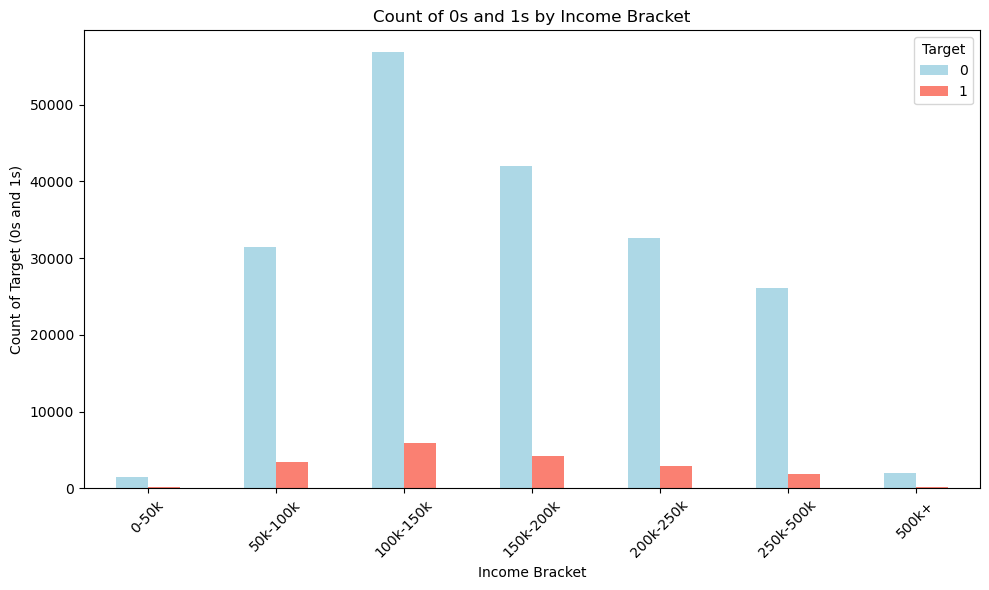

In [34]:
# Assuming 'data' is your DataFrame
# Plot the counts of 0s and 1s in each income bracket
grouped_data.plot(kind='bar', stacked=False, figsize=(10, 6), color=['lightblue', 'salmon'])

# Add labels and title
plt.xlabel('Income Bracket')
plt.ylabel('Count of Target (0s and 1s)')
plt.title('Count of 0s and 1s by Income Bracket')

# Display the plot
plt.xticks(rotation=45)
plt.legend(title='Target')
plt.tight_layout()
plt.show()


In [35]:
#Create Bins for the AMT_ANNUITY
# Step 1: Create bins for 'AMT_ANNUITY'
annuity_bins = [0, 10000, 20000, 30000, 40000, 50000, 100000, data['AMT_ANNUITY'].max()]
annuity_labels = ['0-10k', '10k-20k', '20k-30k', '30k-40k', '40k-50k', '50k-100k', '100k+']

# Create a new column for 'Annuity_Bracket'
data['Annuity_Bracket'] = pd.cut(data['AMT_ANNUITY'], bins=annuity_bins, labels=annuity_labels, right=False)

In [36]:
#Group by 'Annuity_Bracket' and 'target', and count the occurrences
grouped_data2 = data.groupby(['Annuity_Bracket', target]).size().unstack(fill_value=0)

C:\Users\prais_y3huf3n\AppData\Local\Temp\ipykernel_26648\2365817496.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data2 = data.groupby(['Annuity_Bracket', target]).size().unstack(fill_value=0)


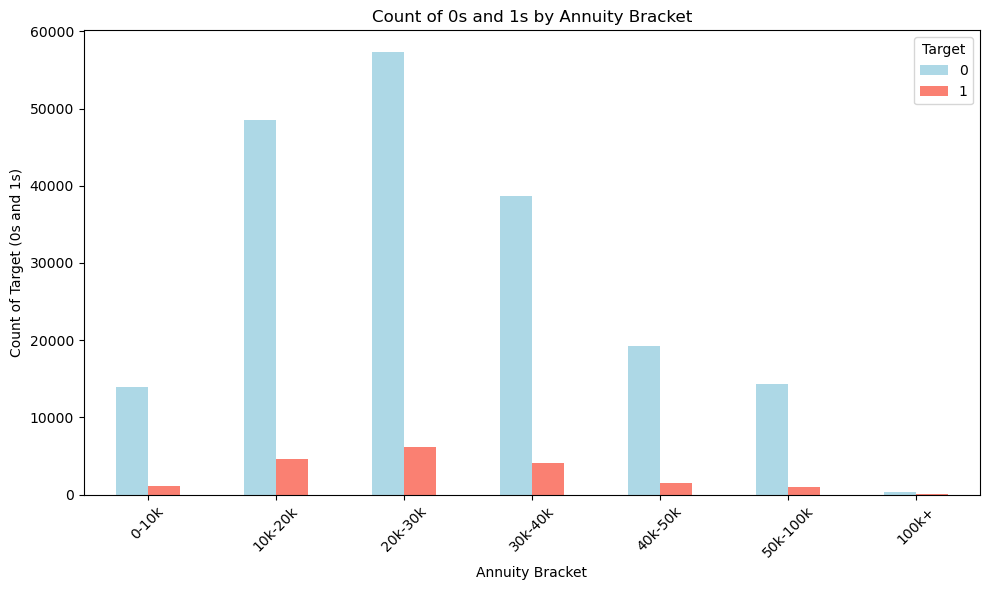

In [37]:
#Plot the counts of 0s and 1s in each annuity bracket
grouped_data2.plot(kind='bar', stacked=False, figsize=(10, 6), color=['lightblue', 'salmon'])
# Add labels and title
plt.xlabel('Annuity Bracket')
plt.ylabel('Count of Target (0s and 1s)')
plt.title('Count of 0s and 1s by Annuity Bracket')

# Display the plot
plt.xticks(rotation=45)
plt.legend(title='Target')
plt.tight_layout()
plt.show()

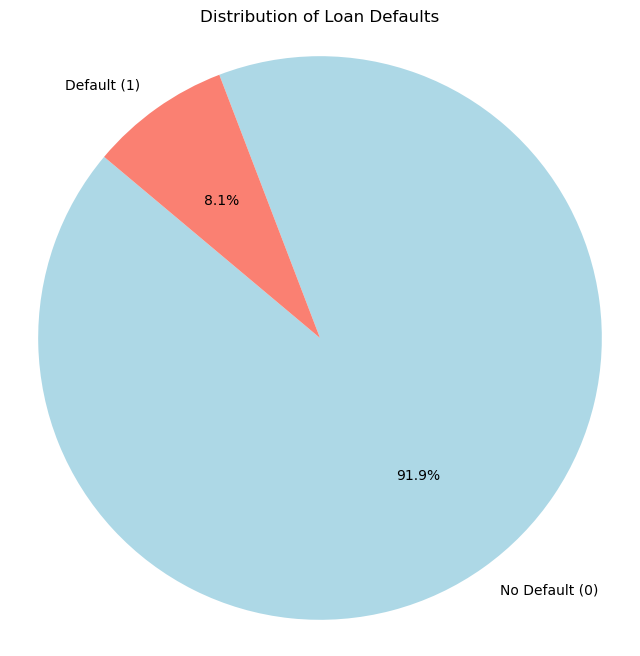

In [38]:
#create pie chart to display accuracy of model
#create new df 
loan_df_new=pd.read_csv('Resources/loan_data.csv')
loan_df_new=loan_df_new.drop(columns=['DAYS_EMPLOYED','NAME_INCOME_TYPE'])
# Prepare data for pie chart
labels = ['No Default (0)', 'Default (1)']
sizes = loan_df_new['TARGET'].value_counts()  # Count occurrences of each target value
# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140,colors=['lightblue', 'salmon'])
plt.title('Distribution of Loan Defaults')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()